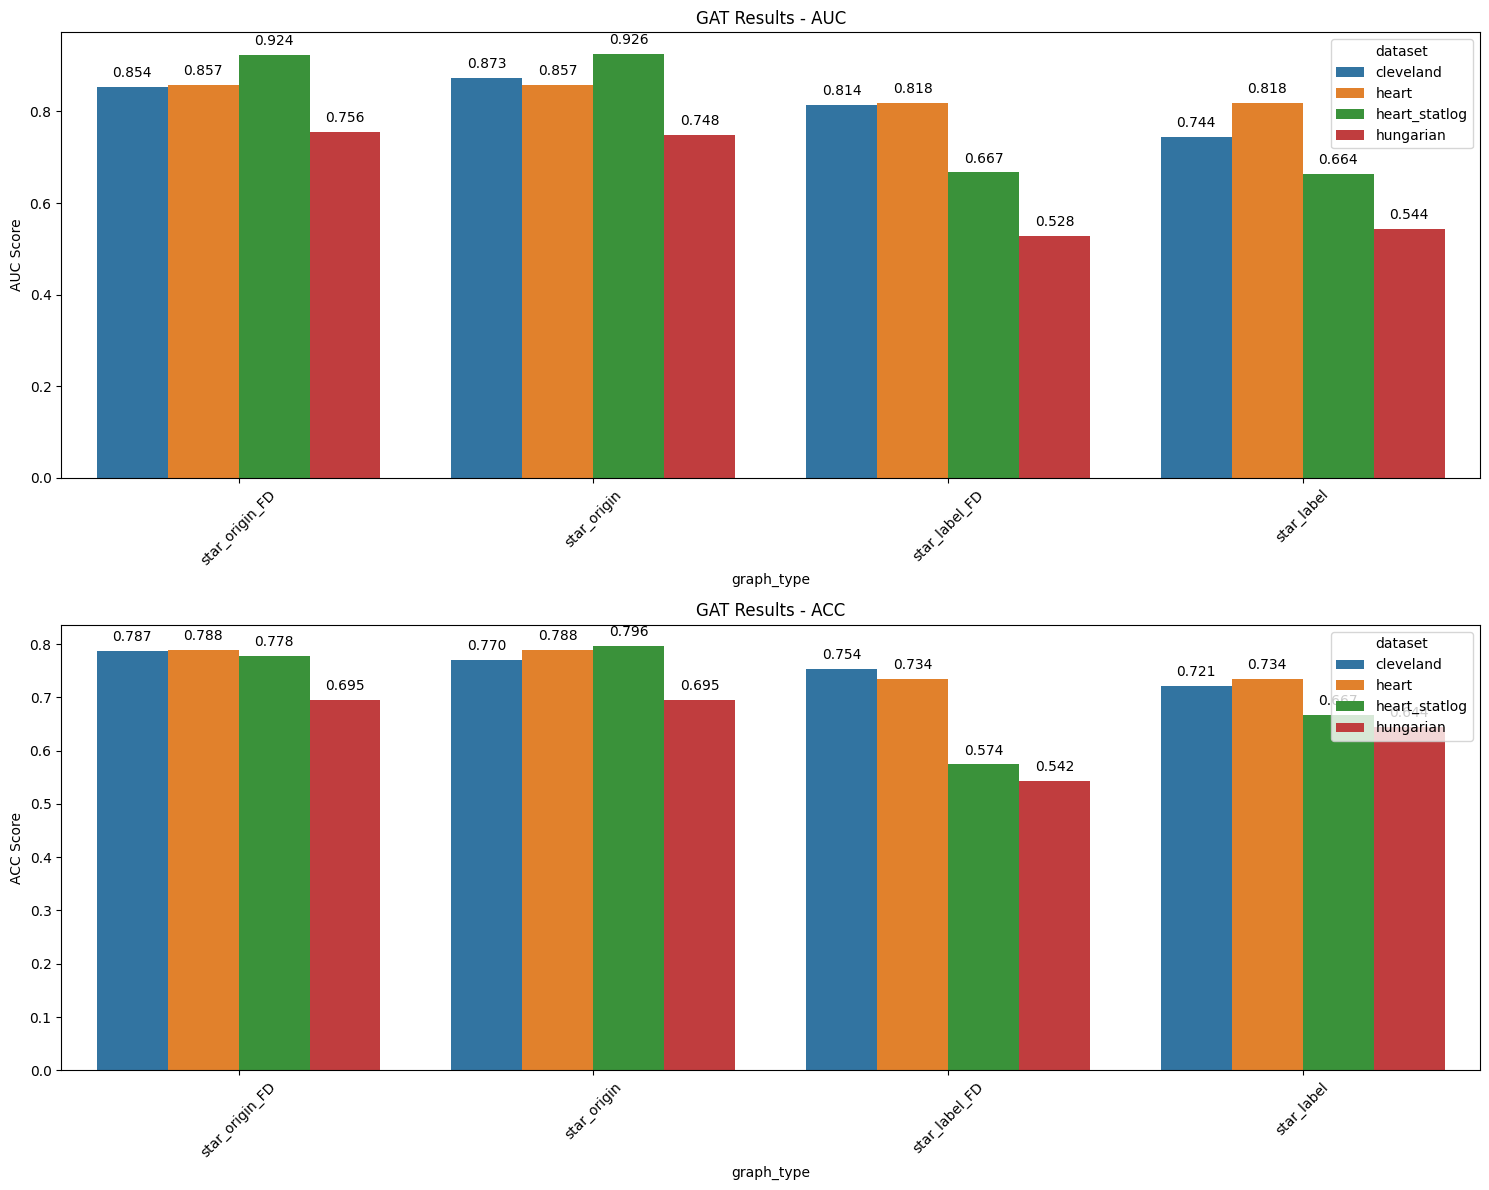

dataset                 cleveland         heart        heart_statlog         \
metric                        ACC    AUC    ACC    AUC           ACC    AUC   
model    graph_type                                                           
GAT      star_label         0.721  0.744  0.734  0.818         0.667  0.664   
         star_label_FD      0.754  0.814  0.734  0.818         0.574  0.667   
         star_origin        0.770  0.873  0.788  0.857         0.796  0.926   
         star_origin_FD     0.787  0.854  0.788  0.857         0.778  0.924   
NORM_GNN star_label         0.623  0.711  0.685  0.765         0.444  0.689   
         star_label_FD      0.656  0.644  0.685  0.765         0.444  0.690   
         star_origin        0.738  0.818  0.788  0.852         0.611  0.917   
         star_origin_FD     0.623  0.810  0.788  0.852         0.444  0.932   

dataset                 hungarian         
metric                        ACC    AUC  
model    graph_type                       
G

In [6]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 기본 경로
base_path = "/home/eungyeop/LLM/tabular/ProtoLLM/experiments/source_to_source_2025"
datasets = ["cleveland", "heart", "heart_statlog", "hungarian"]
models = ["GAT", "NORM_GNN"]

# 결과를 저장할 DataFrame
results = []

# 모든 결과 파일 수집
for dataset in datasets:
    for model in models:
        path = f"{base_path}/{dataset}/{model}/star/*.json"
        json_files = glob.glob(path)
        
        for file_path in json_files:
            with open(file_path, 'r') as f:
                data = json.load(f)
                
                # star 관련 데이터만 처리
                if not data['graph_type'].startswith('star'):
                    continue
                    
                graph_type = data['graph_type']
                
                # AUC와 ACC를 각각 다른 행으로 추가
                results.append({
                    'model': model,
                    'graph_type': graph_type,
                    'dataset': dataset,
                    'metric': 'AUC',
                    'value': data['results']['Ours']['Ours_best_full_auc']
                })
                
                results.append({
                    'model': model,
                    'graph_type': graph_type,
                    'dataset': dataset,
                    'metric': 'ACC',
                    'value': data['results']['Ours']['Ours_best_full_acc']
                })

df = pd.DataFrame(results)

# 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

def add_value_labels(ax, spacing=5):
    """Add value labels on top of each bar"""
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=spacing)

# 각 메트릭별로 별도의 그래프 생성
sns.barplot(data=df[(df['model']=='GAT') & (df['metric']=='AUC')], 
           x='graph_type', y='value', hue='dataset', 
           ax=ax1)
ax1.set_title('GAT Results - AUC')
ax1.set_ylabel('AUC Score')
ax1.tick_params(axis='x', rotation=45)
add_value_labels(ax1)

sns.barplot(data=df[(df['model']=='GAT') & (df['metric']=='ACC')], 
           x='graph_type', y='value', hue='dataset', 
           ax=ax2)
ax2.set_title('GAT Results - ACC')
ax2.set_ylabel('ACC Score')
ax2.tick_params(axis='x', rotation=45)
add_value_labels(ax2)

plt.tight_layout()
plt.show()

# 결과 DataFrame 출력
print(df.pivot_table(index=['model', 'graph_type'], 
                    columns=['dataset', 'metric'], 
                    values='value').round(3))

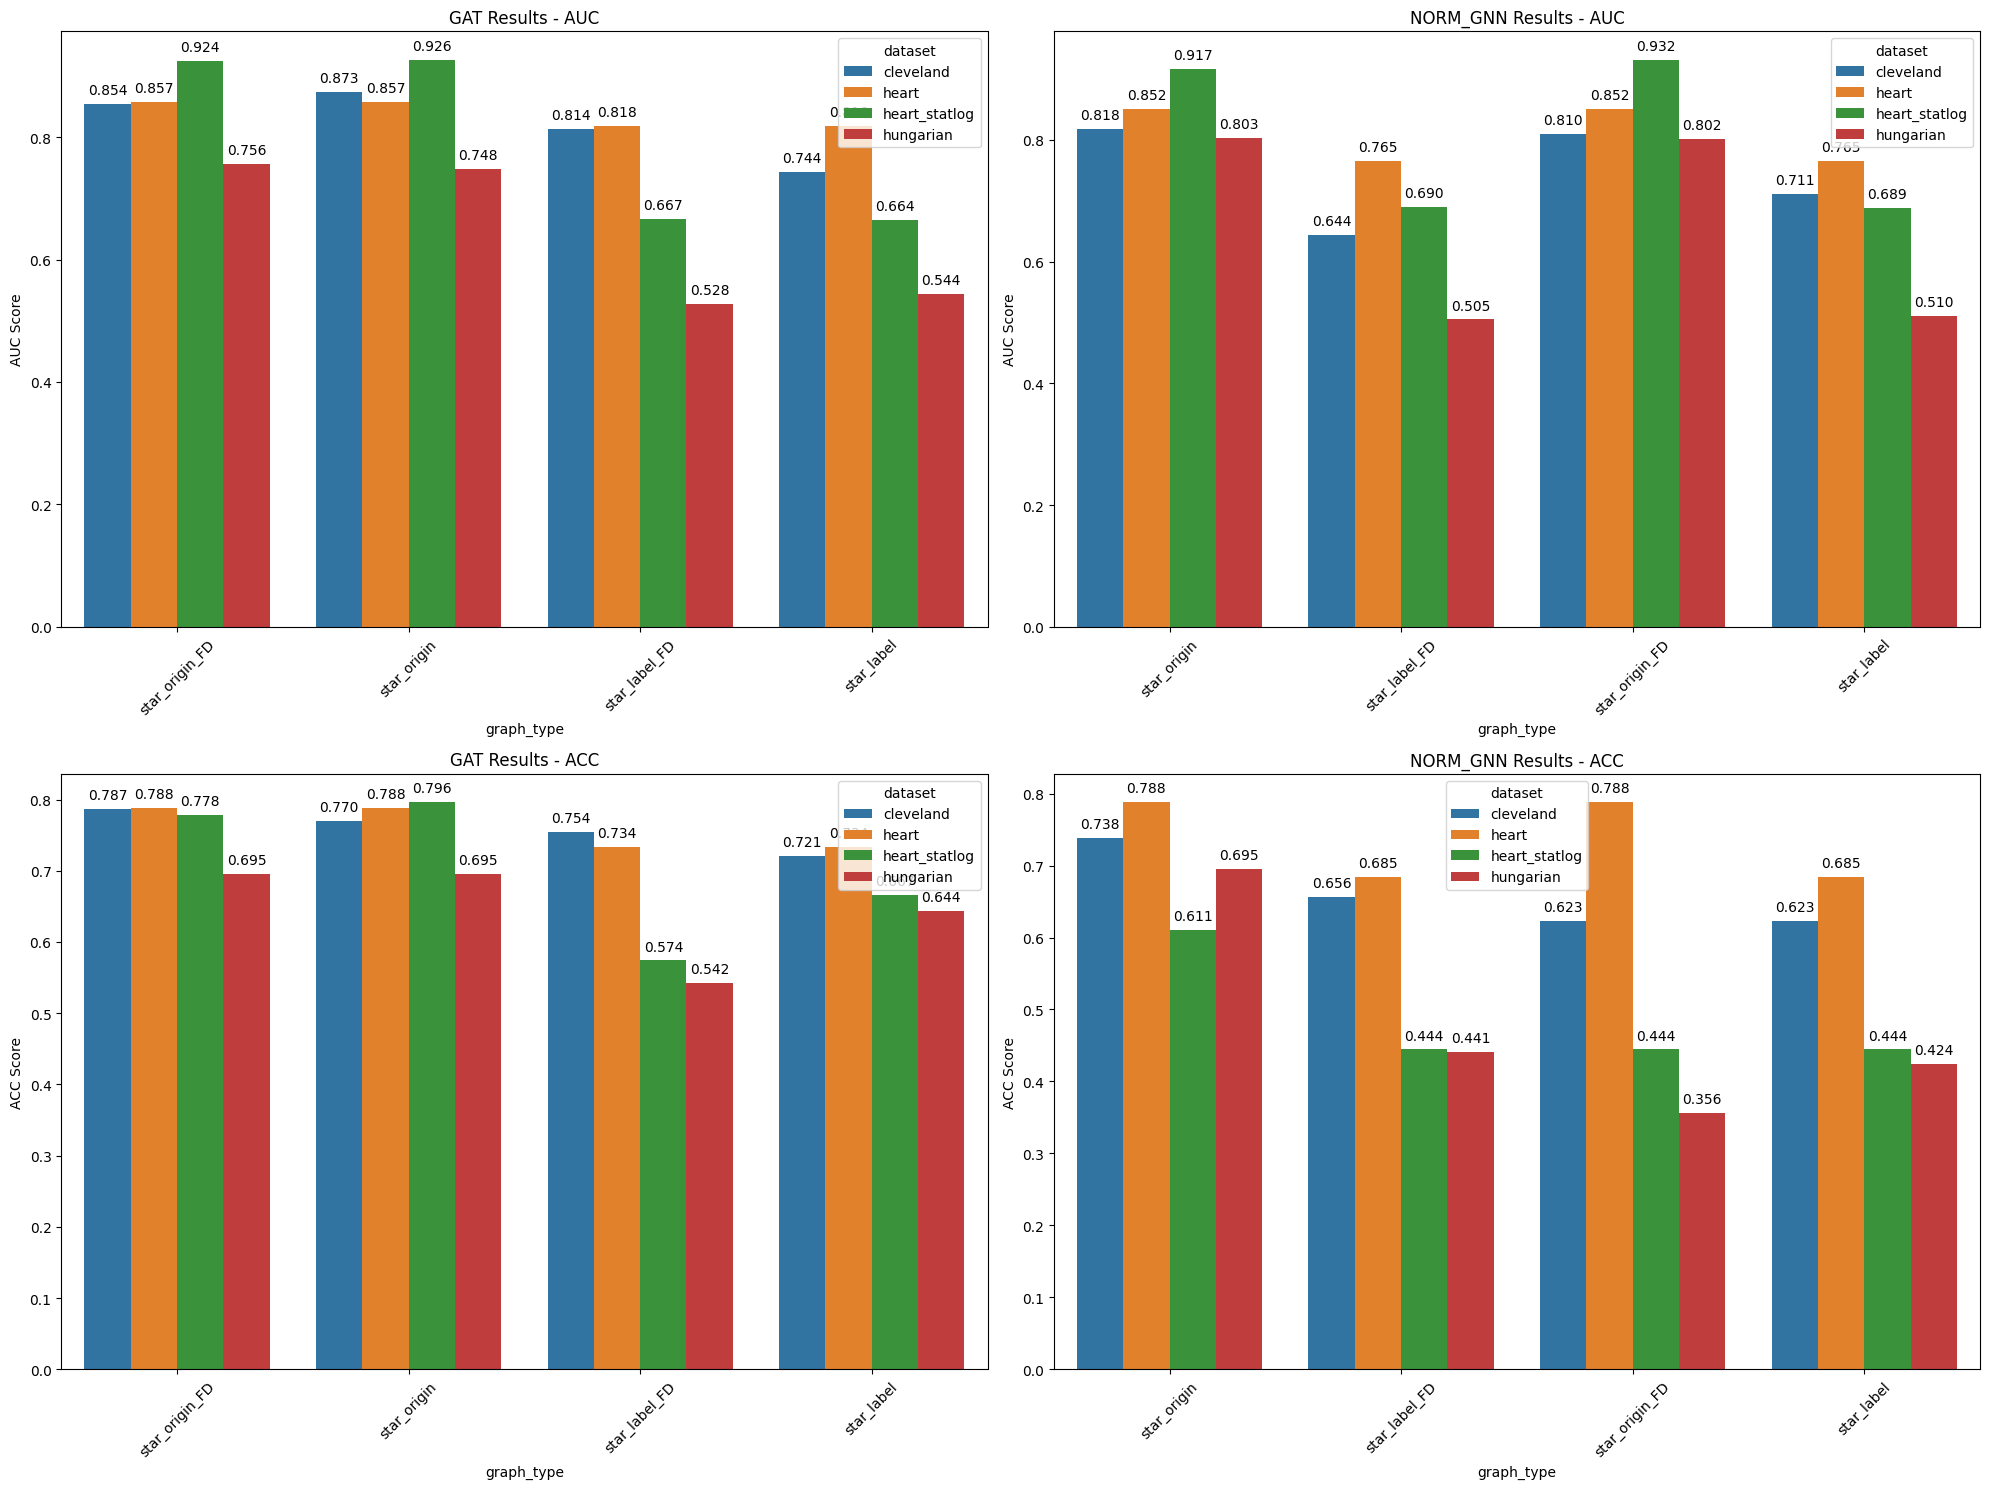

dataset                 cleveland         heart        heart_statlog         \
metric                        ACC    AUC    ACC    AUC           ACC    AUC   
model    graph_type                                                           
GAT      star_label         0.721  0.744  0.734  0.818         0.667  0.664   
         star_label_FD      0.754  0.814  0.734  0.818         0.574  0.667   
         star_origin        0.770  0.873  0.788  0.857         0.796  0.926   
         star_origin_FD     0.787  0.854  0.788  0.857         0.778  0.924   
NORM_GNN star_label         0.623  0.711  0.685  0.765         0.444  0.689   
         star_label_FD      0.656  0.644  0.685  0.765         0.444  0.690   
         star_origin        0.738  0.818  0.788  0.852         0.611  0.917   
         star_origin_FD     0.623  0.810  0.788  0.852         0.444  0.932   

dataset                 hungarian         
metric                        ACC    AUC  
model    graph_type                       
G

In [7]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 기본 경로
base_path = "/home/eungyeop/LLM/tabular/ProtoLLM/experiments/source_to_source_2025"
datasets = ["cleveland", "heart", "heart_statlog", "hungarian"]
models = ["GAT", "NORM_GNN"]

# 결과를 저장할 DataFrame
results = []

# 모든 결과 파일 수집
for dataset in datasets:
    for model in models:
        path = f"{base_path}/{dataset}/{model}/star/*.json"
        json_files = glob.glob(path)
        
        for file_path in json_files:
            with open(file_path, 'r') as f:
                data = json.load(f)
                
                # star 관련 데이터만 처리
                if not data['graph_type'].startswith('star'):
                    continue
                    
                graph_type = data['graph_type']
                
                # AUC와 ACC를 각각 다른 행으로 추가
                results.append({
                    'model': model,
                    'graph_type': graph_type,
                    'dataset': dataset,
                    'metric': 'AUC',
                    'value': data['results']['Ours']['Ours_best_full_auc']
                })
                
                results.append({
                    'model': model,
                    'graph_type': graph_type,
                    'dataset': dataset,
                    'metric': 'ACC',
                    'value': data['results']['Ours']['Ours_best_full_acc']
                })

df = pd.DataFrame(results)

# 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

def add_value_labels(ax, spacing=5):
    """Add value labels on top of each bar"""
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=spacing)

# GAT 결과 (좌측)
sns.barplot(data=df[(df['model']=='GAT') & (df['metric']=='AUC')], 
           x='graph_type', y='value', hue='dataset', 
           ax=ax1)
ax1.set_title('GAT Results - AUC')
ax1.set_ylabel('AUC Score')
ax1.tick_params(axis='x', rotation=45)
add_value_labels(ax1)

sns.barplot(data=df[(df['model']=='GAT') & (df['metric']=='ACC')], 
           x='graph_type', y='value', hue='dataset', 
           ax=ax3)
ax3.set_title('GAT Results - ACC')
ax3.set_ylabel('ACC Score')
ax3.tick_params(axis='x', rotation=45)
add_value_labels(ax3)

# NORM_GNN 결과 (우측)
sns.barplot(data=df[(df['model']=='NORM_GNN') & (df['metric']=='AUC')], 
           x='graph_type', y='value', hue='dataset', 
           ax=ax2)
ax2.set_title('NORM_GNN Results - AUC')
ax2.set_ylabel('AUC Score')
ax2.tick_params(axis='x', rotation=45)
add_value_labels(ax2)

sns.barplot(data=df[(df['model']=='NORM_GNN') & (df['metric']=='ACC')], 
           x='graph_type', y='value', hue='dataset', 
           ax=ax4)
ax4.set_title('NORM_GNN Results - ACC')
ax4.set_ylabel('ACC Score')
ax4.tick_params(axis='x', rotation=45)
add_value_labels(ax4)

plt.tight_layout()
plt.show()

# 결과 DataFrame 출력
print(df.pivot_table(index=['model', 'graph_type'], 
                    columns=['dataset', 'metric'], 
                    values='value').round(3))

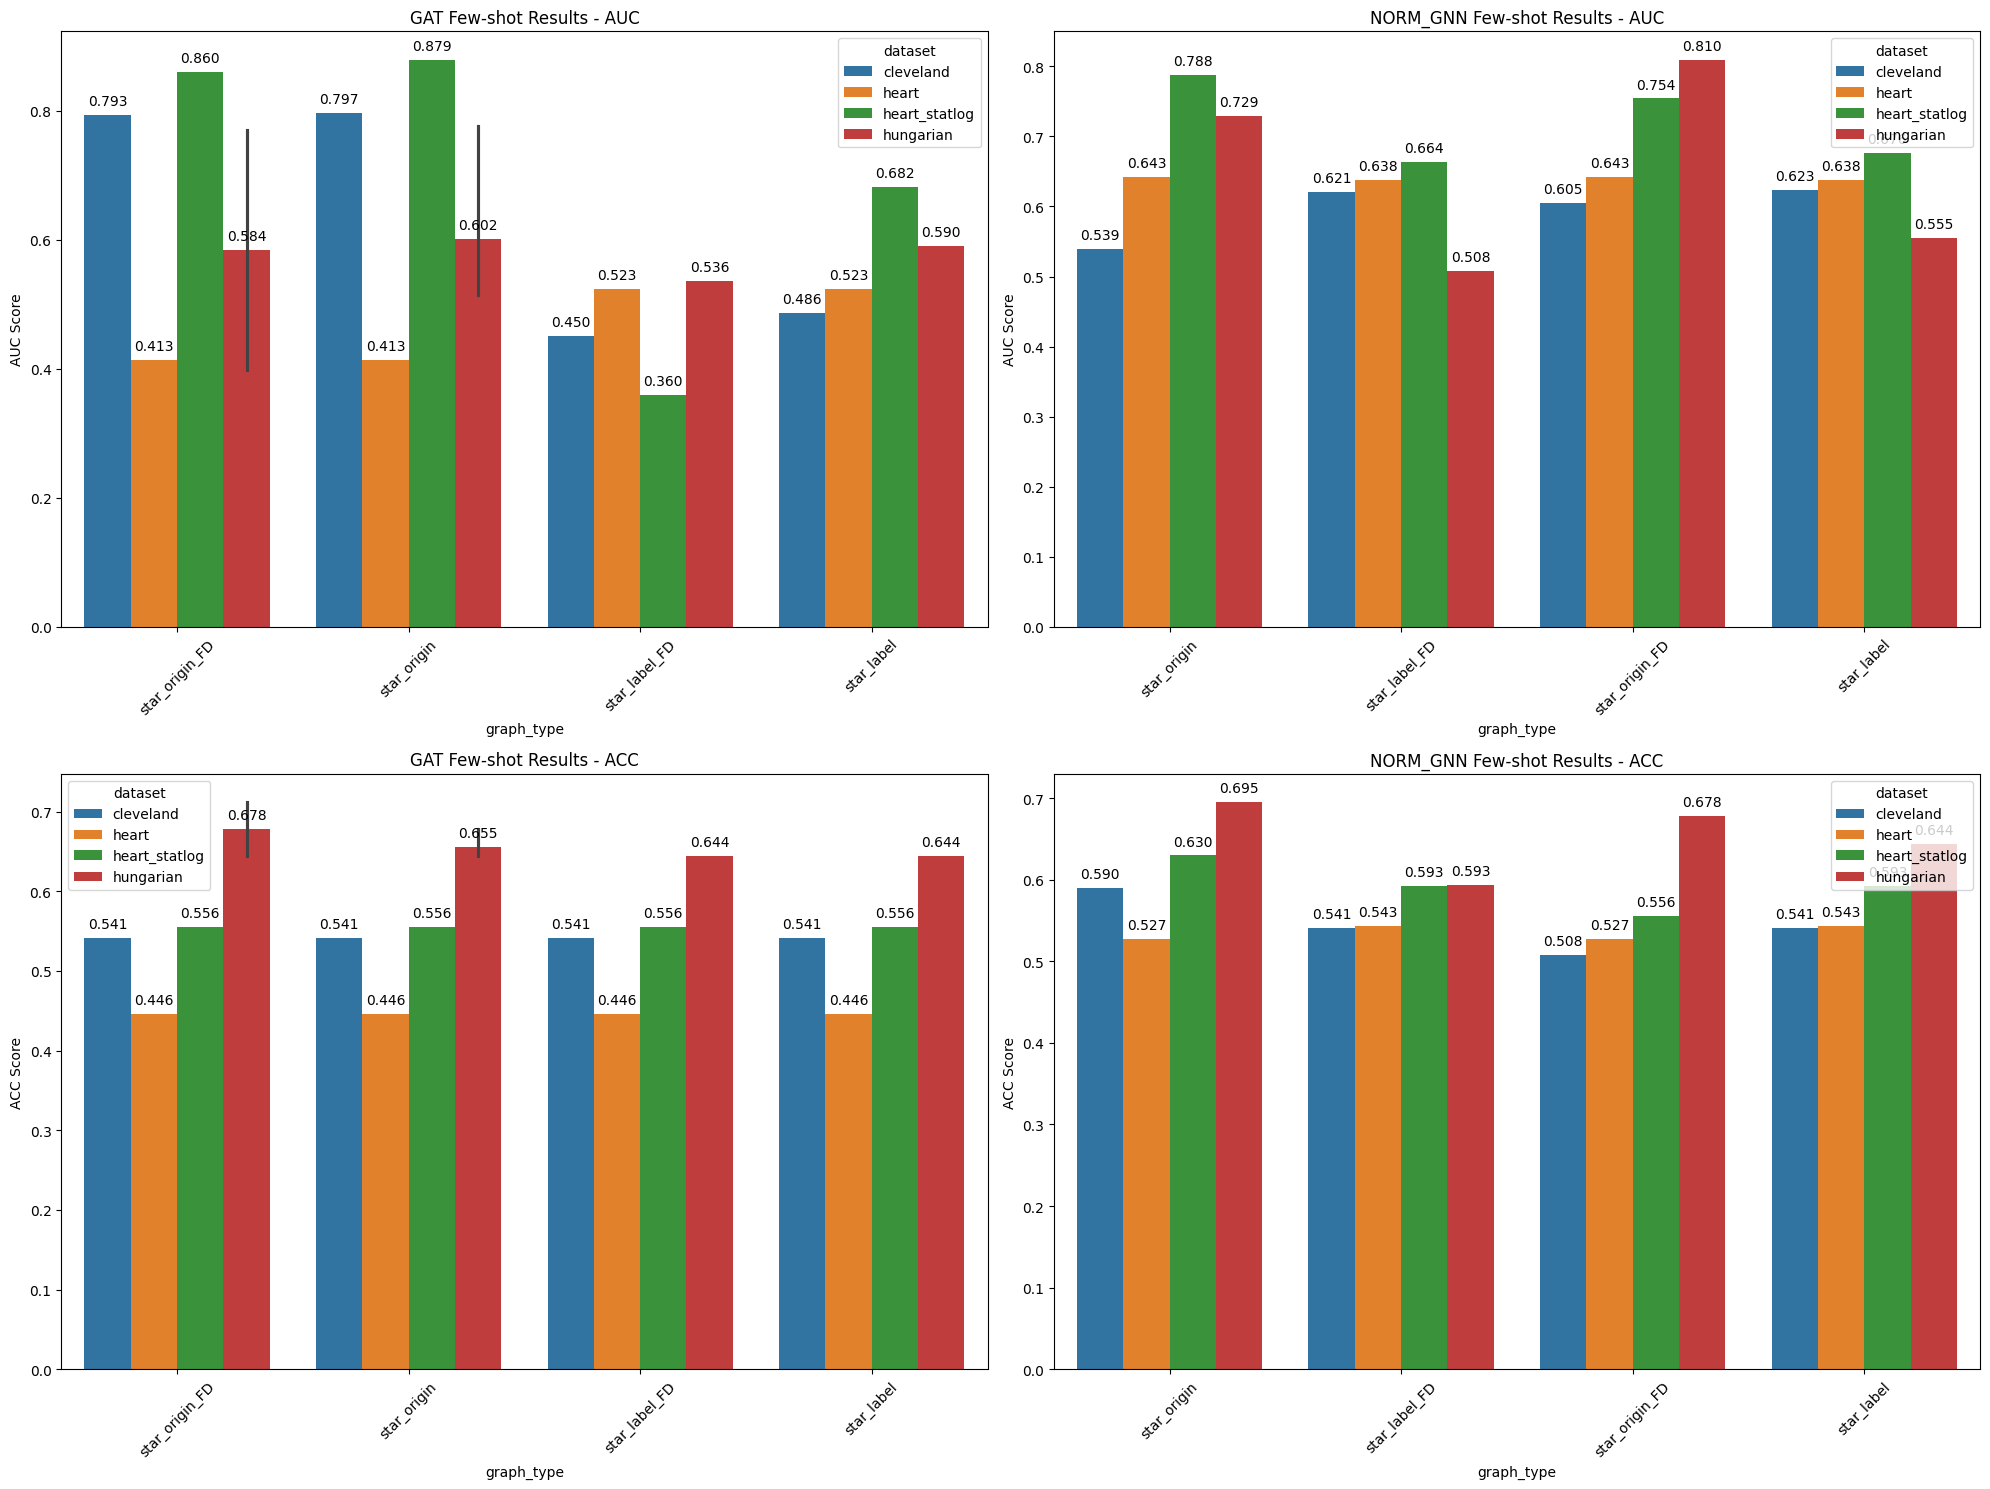

dataset                 cleveland         heart        heart_statlog         \
metric                        ACC    AUC    ACC    AUC           ACC    AUC   
model    graph_type                                                           
GAT      star_label         0.541  0.486  0.446  0.523         0.556  0.682   
         star_label_FD      0.541  0.450  0.446  0.523         0.556  0.360   
         star_origin        0.541  0.797  0.446  0.413         0.556  0.879   
         star_origin_FD     0.541  0.793  0.446  0.413         0.556  0.860   
NORM_GNN star_label         0.541  0.623  0.543  0.638         0.593  0.676   
         star_label_FD      0.541  0.621  0.543  0.638         0.593  0.664   
         star_origin        0.590  0.539  0.527  0.643         0.630  0.788   
         star_origin_FD     0.508  0.605  0.527  0.643         0.556  0.754   

dataset                 hungarian         
metric                        ACC    AUC  
model    graph_type                       
G

In [8]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 기본 경로
base_path = "/home/eungyeop/LLM/tabular/ProtoLLM/experiments/source_to_source_2025"
datasets = ["cleveland", "heart", "heart_statlog", "hungarian"]
models = ["GAT", "NORM_GNN"]

# 결과를 저장할 DataFrame
results = []

# 모든 결과 파일 수집
for dataset in datasets:
    for model in models:
        path = f"{base_path}/{dataset}/{model}/star/*.json"
        json_files = glob.glob(path)
        
        for file_path in json_files:
            with open(file_path, 'r') as f:
                data = json.load(f)
                
                # star 관련 데이터만 처리
                if not data['graph_type'].startswith('star'):
                    continue
                    
                graph_type = data['graph_type']
                
                # AUC와 ACC를 각각 다른 행으로 추가 (few-shot 결과)
                results.append({
                    'model': model,
                    'graph_type': graph_type,
                    'dataset': dataset,
                    'metric': 'AUC',
                    'value': data['results']['Ours_few']['Ours_best_few_auc']
                })
                
                results.append({
                    'model': model,
                    'graph_type': graph_type,
                    'dataset': dataset,
                    'metric': 'ACC',
                    'value': data['results']['Ours_few']['Ours_best_few_acc']
                })

df = pd.DataFrame(results)

# 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

def add_value_labels(ax, spacing=5):
    """Add value labels on top of each bar"""
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=spacing)

# GAT 결과 (좌측)
sns.barplot(data=df[(df['model']=='GAT') & (df['metric']=='AUC')], 
           x='graph_type', y='value', hue='dataset', 
           ax=ax1)
ax1.set_title('GAT Few-shot Results - AUC')
ax1.set_ylabel('AUC Score')
ax1.tick_params(axis='x', rotation=45)
add_value_labels(ax1)

sns.barplot(data=df[(df['model']=='GAT') & (df['metric']=='ACC')], 
           x='graph_type', y='value', hue='dataset', 
           ax=ax3)
ax3.set_title('GAT Few-shot Results - ACC')
ax3.set_ylabel('ACC Score')
ax3.tick_params(axis='x', rotation=45)
add_value_labels(ax3)

# NORM_GNN 결과 (우측)
sns.barplot(data=df[(df['model']=='NORM_GNN') & (df['metric']=='AUC')], 
           x='graph_type', y='value', hue='dataset', 
           ax=ax2)
ax2.set_title('NORM_GNN Few-shot Results - AUC')
ax2.set_ylabel('AUC Score')
ax2.tick_params(axis='x', rotation=45)
add_value_labels(ax2)

sns.barplot(data=df[(df['model']=='NORM_GNN') & (df['metric']=='ACC')], 
           x='graph_type', y='value', hue='dataset', 
           ax=ax4)
ax4.set_title('NORM_GNN Few-shot Results - ACC')
ax4.set_ylabel('ACC Score')
ax4.tick_params(axis='x', rotation=45)
add_value_labels(ax4)

plt.tight_layout()
plt.show()

# 결과 DataFrame 출력
print(df.pivot_table(index=['model', 'graph_type'], 
                    columns=['dataset', 'metric'], 
                    values='value').round(3))

In [16]:
import pickle
import torch
import numpy as np
from tqdm import tqdm

def load_graph_embeddings(pkl_path):
    """
    pkl_path에 저장된 data_list를 로드하고,
    각 Data.x를 모아 하나의 numpy array로 반환.
    
    Returns:
        embeddings (np.ndarray): shape = (total_nodes, embedding_dim)
    """
    with open(pkl_path, 'rb') as f:
        data_list = pickle.load(f)

    all_embeddings = []
    for data in tqdm(data_list, desc=f"Loading {pkl_path}"):
        # data.x는 (num_nodes, embedding_dim) 형태의 텐서
        # CPU 텐서로 변환 후 numpy()로 변경
        x_np = data.x.cpu().numpy()
        all_embeddings.append(x_np)

    # (각 그래프의 모든 노드 임베딩)을 이어붙임
    embeddings = np.concatenate(all_embeddings, axis=0)
    return embeddings

# 실제 사용 예시:
star_p_path = "/storage/personal/eungyeop/dataset/graph/star_P/star_P_adult.pkl"
star_n_path = "/storage/personal/eungyeop/dataset/graph/star_N/star_N_adult.pkl"
star_n__path = "/storage/personal/eungyeop/dataset/graph/star_N_/star_N__adult.pkl"
star_p_embeddings = load_graph_embeddings(star_p_path)  # random 임베딩( FD='P' )
star_n_embeddings = load_graph_embeddings(star_n_path)  # GPT-2 임베딩( FD='N' 혹은 'N_' )
star_n__embeddings = load_graph_embeddings(star_n__path)  # GPT-2 임베딩( FD='N' 혹은 'N_' )

Loading /storage/personal/eungyeop/dataset/graph/star_P/star_P_adult.pkl: 100%|██████████| 48842/48842 [00:00<00:00, 281512.31it/s]
Loading /storage/personal/eungyeop/dataset/graph/star_N/star_N_adult.pkl: 100%|██████████| 48842/48842 [00:00<00:00, 247278.89it/s]
Loading /storage/personal/eungyeop/dataset/graph/star_N_/star_N__adult.pkl: 100%|██████████| 48842/48842 [00:00<00:00, 243181.40it/s]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.002s...
[t-SNE] Computed neighbors for 4000 samples in 0.388s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.122707
[t-SNE] KL divergence after 1000 iterations: -1.179834


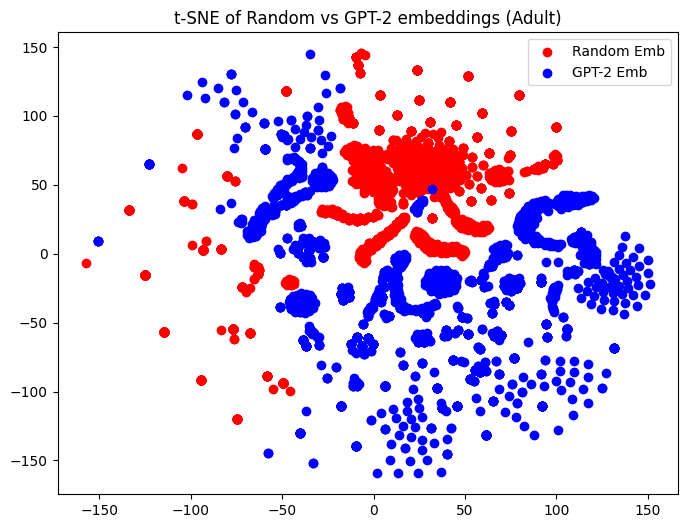

In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_embeddings_tsne(emb_random, emb_gpt2, n_samples=2000):
    """
    랜덤 임베딩(emb_random)과 GPT-2 임베딩(emb_gpt2)을 t-SNE로 시각화.
    n_samples: 너무 많으면 t-SNE가 오래 걸리므로, 임의 샘플링 개수 지정.
    """
    # 1) 필요 시 샘플링
    if emb_random.shape[0] > n_samples:
        idx = np.random.choice(emb_random.shape[0], n_samples, replace=False)
        emb_random = emb_random[idx]
    if emb_gpt2.shape[0] > n_samples:
        idx = np.random.choice(emb_gpt2.shape[0], n_samples, replace=False)
        emb_gpt2 = emb_gpt2[idx]

    # 2) 합쳐서 t-SNE
    combined = np.concatenate([emb_random, emb_gpt2], axis=0)
    labels = np.array([0]*len(emb_random) + [1]*len(emb_gpt2))

    tsne = TSNE(n_components=2, random_state=42, verbose=1, perplexity=30)
    emb_2d = tsne.fit_transform(combined)

    # 분리해서 그리기
    emb_2d_random = emb_2d[labels == 0]
    emb_2d_gpt2 = emb_2d[labels == 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(emb_2d_random[:, 0], emb_2d_random[:, 1], c='red', label='Random Emb')
    plt.scatter(emb_2d_gpt2[:, 0], emb_2d_gpt2[:, 1], c='blue', label='GPT-2 Emb')
    plt.title("t-SNE of Random vs GPT-2 embeddings (Adult)")
    plt.legend()
    plt.show()


# 시각화 실행
visualize_embeddings_tsne(star_p_embeddings, star_n_embeddings, n_samples=2000)
